In [1]:
from tools import *
from network import * 
from inference import *
import numpy as np

# Example Network generation 

### create abstract network instance 

In [3]:
network = Network(N=100, K_aff=3, seed=42, dirichlet=1, prob_ratio=0.1)

### use this network instance to generate A0 and A1

In [15]:
N=30
avg_degree=30
T=30

A0 = network.generate_A0(T, avg_degree, symmetric=True)

K_exp = 2
A1 = network.apply_exposure(A0, K_exp)

In [7]:
mu, Z, u, w = network.get_mu(), network.get_Z(), network.get_u(), network.get_w()

# Example Writing and Reading of Parameters and networks

In [29]:
folder = "./example/"

write_data(folder, "data", A1)
np.savez(folder + "params", mu=mu, Z=Z, u=u, w=w)

Adjacency matrix saved in: ./example/data.csv


In [30]:
data = read_data(folder, "data")
assert(np.all(data==A1))
params = np.load(folder + "params.npz")
mu, Z, u, w = params["mu"], params["Z"], params["u"], params["w"]

# Example Inference 

## Exposure Inference

In [17]:
K_aff = 3         # both these values can vary compared to the ground truth, however then performance metric might not be usable
K_exp = 2         
iter1 = 50        # number of outer loop updates
iter2 = 10        # number of theta updates in outer update loop
iter3 = 5         # number of mu and Q updates in outer update loop
symmetric = False # always False for our project


losses_exp, params_exp = fit(data, K_aff, K_exp, seed=42, symmetric=symmetric, iter1=iter1, iter2=iter2, iter3=iter3, exp=True)

running Exp inference for 750 iterations: 

Exposure inference with T=30, N=100, K=3 and 636 iterations took 23.30459049300407 seconds



### Analysis

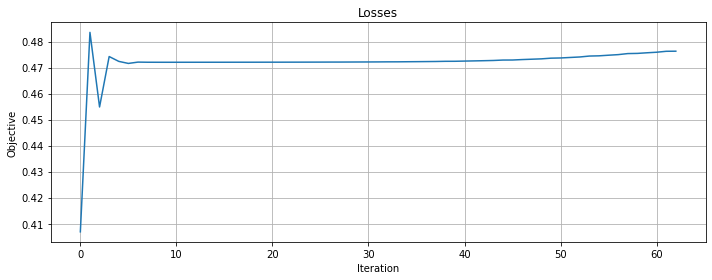

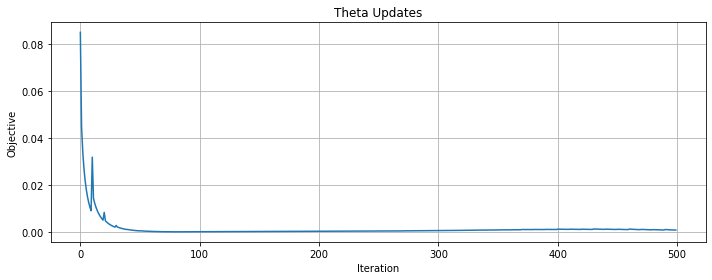

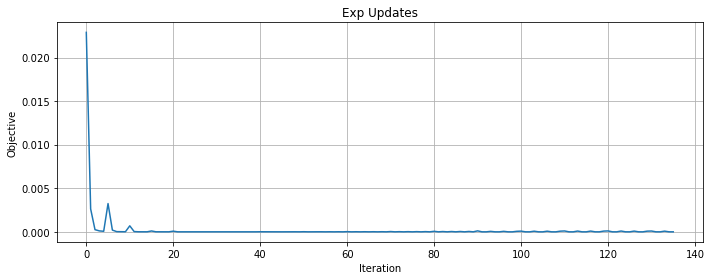

In [18]:
plot_losses(losses_exp[0], title="Losses")
plot_losses(losses_exp[1], title="Theta Updates")
plot_losses(losses_exp[2], title="Exp Updates")

In [19]:
mu_exp, Q, u_exp, v_exp, w_exp = params_exp[0], params_exp[1], params_exp[2], params_exp[3], params_exp[4]

In [21]:
acc_u, acc_v = evaluate_memberships(u, u_exp, u, v_exp)[0:2]
acc_mu = evaluate_memberships(mu, mu_exp, mu, mu_exp)[0]
AUC_Q = calculate_AUC(Z, Q)

print(f"accuracy u: {(acc_u + acc_v)/2}, accuracy mu: {acc_mu}, AUC Q: {AUC_Q}")

accuracy u: 0.8239963987380275, accuracy mu: 0.8887919218571387, AUC Q: 0.8251950985473006


## No Exposure Inference

In [24]:
K_aff = 3         # can vary compared to the ground truth, however then performance metric might not be usable
symmetric = False # always False for our project

losses_noexp, params_noexp = fit(data, K_aff, None, seed=42, symmetric=symmetric, exp=False)

running NoExp inference for 20000 iterations: 

Convergence Criterium satisfied
No exposure inference with T=30, N=100, K=3 and 8040 iterations took 42.587808087002486 seconds



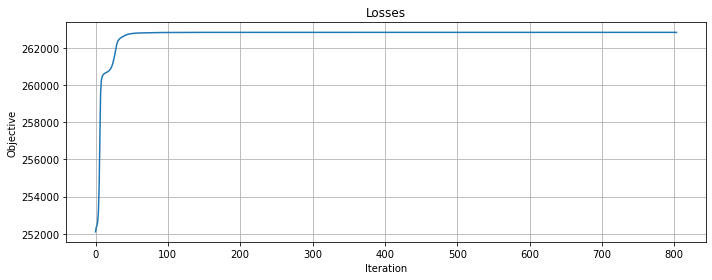

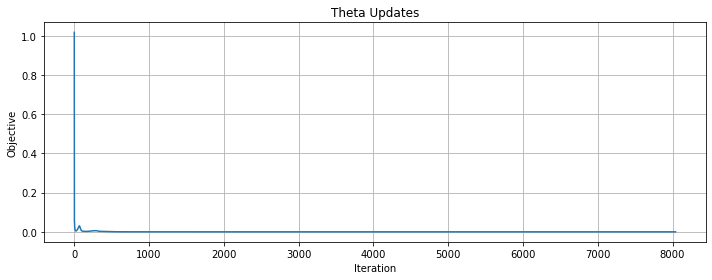

In [25]:
plot_losses(losses_noexp[0], title="Losses")
plot_losses(losses_noexp[1], title="Theta Updates")

In [26]:
u_noexp, v_noexp, w_noexp = params_noexp[0], params_noexp[1], params_noexp[2]

In [27]:
acc_u, acc_v = evaluate_memberships(u, u_exp, u, v_exp)[0:2]
print(f"accuracy u: {(acc_u + acc_v)/2}")

accuracy u: 0.8239963987380275
